# **Machine Learning Lab 4EII - IA course**

## 1- **Introduction**

This lab aim at using simple **machine learning** classifiers via sklearn Python module for a classification problem of recognizing handwritten digits. We consider ten digits 0 to 9 from MNIST dataset, with using some machine learning algorithms, i.e. **Decision Trees**, **Random Forest** and **svm** used as **classifiers**. 

In this lab you will learn to:
* Use the sklearn machine learning library
* Use different machine learning algorithms to classify 10 digits from MNIST dataset
* Study the performance and hyper-parameters of these classifiers
* Display graph results using the matplotlib module and confusion matrix

## 2- **Module importation**
Import some useful and common python modules 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import progressbar
import time

## 3- **Download and study the the MNIST dataset**



### 3.a - Download the MNIST dataset

MNIST dataset contains 70000 images of handwritten digits from 0 to 9. The dataset contains images of size 28x28 pixels and the corresponding labels

In [2]:
mnist = fetch_openml('mnist_784') #You can also use and test Fashion-MNIST dataset

### 3.b - Create a class structure to save and analyse the dataset

In [3]:
def computeentropy(image):
  lensig=image.size
  symset=list(set(image))
  numsym=len(symset)
  propab=[np.size(image[image==i])/(1.0*lensig) for i in symset]
  ent=np.sum([p*np.log2(1.0/p) for p in propab])
  return ent;

class Digit:
  def __init__(self, data, target):
    self.width  = int(np.sqrt((len(data))))
    self.target = target;
    self.image = data;
    self.features = {
                     'var'        :0.0, 'std'        :0.0,
                     'mean'       :0.0, 'entropy'    :0.0,
                    }
    self.computeFeatures()
    
  def computeFeatures(self):
    self.features['var'] = round(np.var(self.image),2)
    self.features['std'] = round(np.std(self.image),2)
    self.features['mean'] = round(np.mean(self.image),2)
    self.features['entropy'] = round(computeentropy(self.image),2)

  def print(self):
    print("Digit target: " + str(self.target))
    print("Digit target size: "+ str(self.width)  + "x" +str(self.width) + 
          '| mean : ' + str(self.features['mean']) +
          '| var : ' + str(self.features['var']) + 
          '| std :' + str(self.features['std']) + 
          '| entropy :' + str(self.features['entropy']))
    print("Digit image:")
    plt.figure()
    plt.gray()
    plt.matshow(self.image.reshape(self.width, self.width)) 
    plt.savefig(str(self.target)+'.png', bbox_inches='tight')
    plt.show() 

class Dataset:    
  def __init__(self, data, size=0):  
    self.length = int((len(data['data'])))
    if size > 0 and size <  self.length:
      self.length = size;
    else:
      size = self.length;  

    self.targets  = data['target'][0:size]
    self.data = data['data'][0:size];
    self.digits       = []
    self.createDigits()
    self.X_train = []; 
    self.X_test = []; 
    self.y_train = []; 
    self.y_test = [];  
  
  def printInfo(self):
    from collections import Counter
    
    c = Counter(self.targets)
    info = "Dataset size " + str(self.length)
    key_value = {} 
    for i in sorted(c.keys()):
      key_value[i] = c[i];
     
    plt.bar(key_value.keys(), key_value.values());
    plt.xlabel('Labels')
    plt.ylabel('Occurrence')
    plt.title('Occurrence of MNIST dataset labels')
    ax = plt.axes()        
    ax.grid(which='major', axis='y')
    plt.show()
    return info
  
  def createDigits(self):
    for i in range(self.length):
        self.digits.append(Digit(self.data[i], self.targets[i]))

  def separate_train_test(self, test_size_ratio):
    from sklearn.model_selection import train_test_split 

    self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.data, self.targets, test_size=test_size_ratio)
    # data normalization   
    self.X_train = self.X_train/255;
    self.X_test  = self.X_test/255;
    print('Size of training set : ' + str(len(self.y_train)) + ' / ' + str(len(self.data)));
    print('Size of testing set : ' + str(len(self.y_test))+ ' / ' + str(len(self.data)));

  def display_train_test(self):
    from collections import Counter

    test = Counter(self.y_test)
    train = Counter(self.y_train)
    info = "Dataset size " + str(self.length) 
    
    key_value_train = {};
    key_value_test = {};
    
    for i in sorted(test.keys()):
      key_value_test[i] = test[i];
    for i in sorted(train.keys()):
      key_value_train[i] = train[i];

    p1 = plt.bar(key_value_train.keys(), key_value_train.values(), width=0.5);
    p2 = plt.bar( key_value_test.keys(), key_value_test.values(), width=0.5, bottom=list(key_value_train.values()) ); 
    
    plt.legend((p1[0], p2[0]), ('Training set', 'Test set'), loc='lower left')
    plt.xlabel('Labels')
    plt.ylabel('Occurrence')
    plt.title('Occurrence of training and testing sets')
    ax = plt.axes()        
    ax.grid(which='major', axis='y')
    plt.show();    

### 3.b - Load the MNIST dataset in Dataset class and analyse it: 
1.   Load the dataset in Dataset class 

*samples* is the number of considered samples (sub-set) over 700000 of MNIST dataset, it enables faster training and testing



In [4]:
samples = 20000;  
#TO BE COMPLETED
training_set = Dataset(mnist, samples)

2.   Display some digist with corresponding features  

Digit target: 5
Digit target size: 28x28| mean : 35.11| var : 6343.94| std :79.65| entropy :1.83
Digit image:


<Figure size 432x288 with 0 Axes>

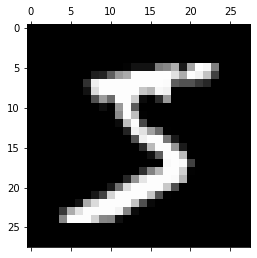

Digit target: 0
Digit target size: 28x28| mean : 39.66| var : 7037.06| std :83.89| entropy :1.92
Digit image:


<Figure size 432x288 with 0 Axes>

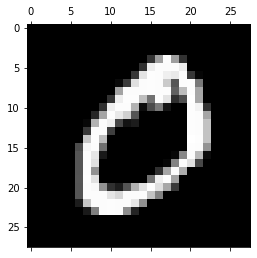

Digit target: 4
Digit target size: 28x28| mean : 24.8| var : 4300.7| std :65.58| entropy :1.46
Digit image:


<Figure size 432x288 with 0 Axes>

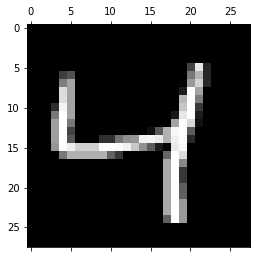

Digit target: 1
Digit target size: 28x28| mean : 21.86| var : 4366.42| std :66.08| entropy :1.1
Digit image:


<Figure size 432x288 with 0 Axes>

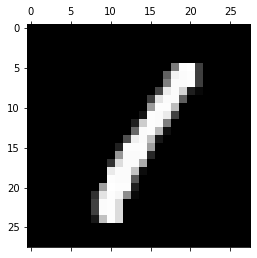

Digit target: 9
Digit target size: 28x28| mean : 29.61| var : 5531.09| std :74.37| entropy :1.61
Digit image:


<Figure size 432x288 with 0 Axes>

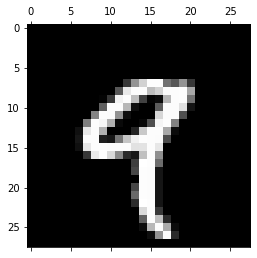

Digit target: 2
Digit target size: 28x28| mean : 37.76| var : 6577.97| std :81.1| entropy :2.11
Digit image:


<Figure size 432x288 with 0 Axes>

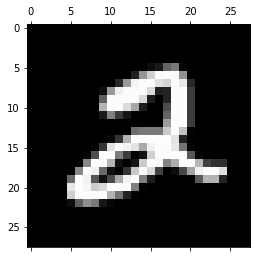

Digit target: 1
Digit target size: 28x28| mean : 22.51| var : 4602.49| std :67.84| entropy :0.94
Digit image:


<Figure size 432x288 with 0 Axes>

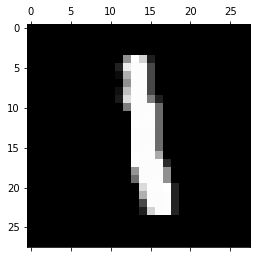

Digit target: 3
Digit target size: 28x28| mean : 45.75| var : 8102.99| std :90.02| entropy :1.99
Digit image:


<Figure size 432x288 with 0 Axes>

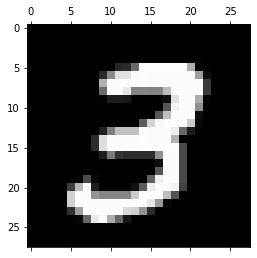

Digit target: 1
Digit target size: 28x28| mean : 13.87| var : 2768.36| std :52.62| entropy :0.81
Digit image:


<Figure size 432x288 with 0 Axes>

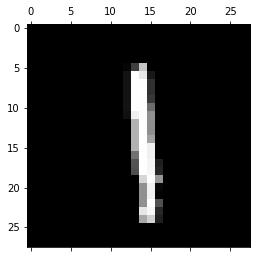

Digit target: 4
Digit target size: 28x28| mean : 27.94| var : 5120.58| std :71.56| entropy :1.59
Digit image:


<Figure size 432x288 with 0 Axes>

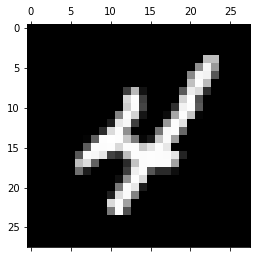

In [5]:
samples_to_diplay = 10#TO BE COMPLETED
for i in range(samples_to_diplay):
  training_set.digits[i].print()

3.   Display digits repartitions with *printInfo* function of *Dataset* class

*   Is the dataset well balanced ?





> *As we can see, there is a smooth discrepancy related to the label '1', but nothing relevant enough to invalid the dataset.*


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:70: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


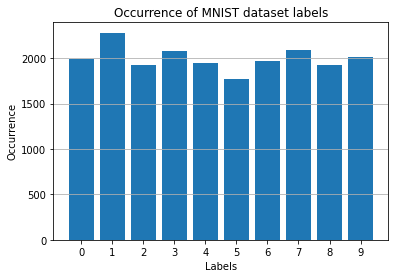

'Dataset size 20000'

In [6]:
training_set.printInfo()

## 4 - **Dataset preparation**


> The MNIST dataset is split to training and testing sets with the corresponding labels



### 4.a - Split the the MNIST dataset in training and testing sets 

*   Use *separate_train_test* function with a test set split ratio as parameter 
*   The test and train sets will be loaded in X_train and X_test lists and the corresponding labels in y_train and y_test lists. 




In [7]:
test_ratio = 0.2;
#TO BE COMPLETED
training_set.separate_train_test(test_ratio)

Size of training set : 16000 / 20000
Size of testing set : 4000 / 20000


### 4.b - Display the repartition of the digits 

*   Use  *display_train_test* function to illustrate the digits' repartition 
*   Check whether the repartition ratio is correct 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:111: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


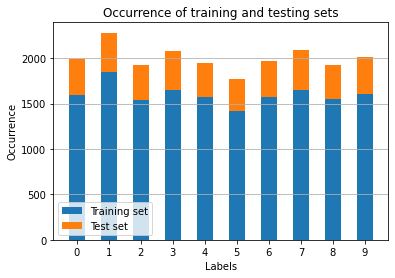

In [8]:
#TO BE COMPLETED
training_set.display_train_test()

> *Since we have 20000 samples for label '0' and the test ratio is 25%, we should have 4000 test samples selected, which can be noticed through the graph above. The proportion is maintained for the rest of the dataset as well.*

## 5 - **Classifier Training and testing**


### 5.a - Training and testing the Decision Tree (DT) model

> In this section, you will have to initialize a Decision Tree classifier and train it with the generated training set.

> Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

> *Useful functions &Rightarrow; DecisionTreeClassifier and DecisionTreeClassifier.fit()*

> For more details, you can refer to the sklearn documentation [Decision Tree](https://scikit-learn.org/stable/modules/tree.html)

In [9]:
from sklearn.tree import DecisionTreeClassifier
depth = 5;
clf = DecisionTreeClassifier(random_state=0, max_depth=depth)

clf.fit(training_set.X_train, training_set.y_train)
print ("Accuracy on training set " + str(round(clf.score(training_set.X_train, training_set.y_train),2)));
print ("Accuracy on testing set " + str(round(clf.score(training_set.X_test, training_set.y_test),2)));

Accuracy on training set 0.69
Accuracy on testing set 0.68


### 5.b - Hyper-parameters optimisation of the Decision Tree (DT) model


> In this section you will train the DT model with different depths and select the one that enables the best performance in terms of trade-off between accuracy on the testing test and complexity while avoiding over-fitting 



100% (7 of 7) |##########################| Elapsed Time: 0:00:20 ETA:  00:00:00

<Figure size 576x288 with 0 Axes>

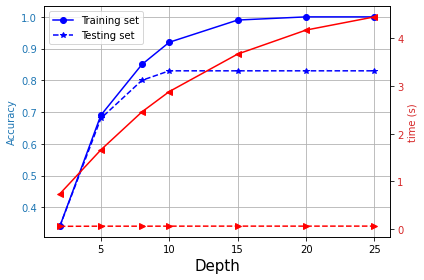

<Figure size 432x288 with 0 Axes>

In [10]:
from sklearn.tree import DecisionTreeClassifier

depths = [2,5,8,10,15,20, 25]
score_training = [0.0 for i in range(len(depths))]
score_testing  = [0.0 for i in range(len(depths))]
time_train  = [0.0 for i in range(len(depths))]
time_test  = [0.0 for i in range(len(depths))]
idx=0;
bar = progressbar.ProgressBar(maxval=len(depths)).start()

for d in depths:
  clf = DecisionTreeClassifier(random_state=0, max_depth=d)
  t = time.process_time()
  #TO BE COMPLETED perform training 
  clf.fit(training_set.X_train, training_set.y_train)
  time_train[idx] = time.process_time() - t
  score_training[idx] = round(clf.score(training_set.X_train, training_set.y_train),2)#TO BE COMPLETED
  score_testing[idx] = round(clf.score(training_set.X_test, training_set.y_test),2)#TO BE COMPLETED
  time_test[idx] = time.process_time() - t - time_train[idx]
  idx +=1;
  bar.update(idx)


plt.figure(figsize=(8,4))
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Depth', fontsize=15,)
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(depths, score_training, '-bo', label='Training set')
ax1.plot(depths, score_testing, '--b*', label='Testing set')
ax1.tick_params(axis='y', labelcolor=color)
plt.grid()
plt.legend(loc='upper left')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'

ax2.set_ylabel('time (s)', color=color)
ax2.plot(depths, time_train, '-r<', label='Training set')  # we already handled the x-label with ax1
ax2.plot(depths, time_test, '--r>', label='Testing set')  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped


plt.show()
plt.savefig('perf.png')

###  5.c - Cross-validation of the best performing solution

 In this section you will test the best performing DT configuration in cross-validation approach.

> The [cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html) will split the training set in k non-overlapping sub-sets. Then the model is trained on (k-1) sub-sets and tested on the remaining sub-set. This process is performed k times on k different testing sub-sets and take the average accuracy with confidence interval (CI).

> Illustration of the cross validation repartition. 
![Dataset repartition for cross-validation process (k=5)](https://drive.google.com/uc?id=1yG7pIHas_BlgPOMvUWOkWsiC_6q0e3-P)

> Is the performance on testing set accurate and valid ?  

In [11]:
from sklearn.model_selection import cross_val_score
best_depth = 15#TO BE COMPLETED
k = 3#TO BE COMPLETED Number of sub-sets < 4
clf = DecisionTreeClassifier(random_state=0, max_depth=best_depth) 
clf.fit(training_set.X_train, training_set.y_train)
print ('Accuracy on training set= ' +  str(round(clf.score(training_set.X_train, training_set.y_train),2)));
scores = cross_val_score(clf, training_set.X_train, training_set.y_train, cv=k, scoring='accuracy')
print (scores)
print("Accuracy: %0.2f (CI : +/- %0.2f)" % (scores.mean(), scores.std() * 2))
print ('Accuracy on test set= ' +  str(round(clf.score(training_set.X_test, training_set.y_test),2))); 

Accuracy on training set= 0.99
[0.82133483 0.79823739 0.81511344]
Accuracy: 0.81 (CI : +/- 0.02)
Accuracy on test set= 0.83


> *Considering the simplicity of the classifier, we can say that a score of 0.83% is accurate. Although, we expect higher accuracy on a reliable classifier.*

###  5.d - Display the confusion matrix
By definition a confusion matrix C is such that Cij is equal to the number of observations known to be in group i and predicted to be in group j.

1.   *plot_confusion_matrix* function enables to display a confusion matrix *cm*




In [12]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
  import matplotlib.pyplot as plt
  import numpy as np
  import itertools

  accuracy = np.trace(cm) / float(np.sum(cm))
  misclass = 1 - accuracy

  if cmap is None:
    cmap = plt.get_cmap('Blues')
  plt.figure(figsize=(8, 6))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()

  if target_names is not None:
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

  thresh = cm.max() / 1.5 if normalize else cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if normalize:
      plt.text(j, i, "{:0.3f}".format(cm[i, j]),
              horizontalalignment="center",
              color="white" if cm[i, j] > thresh else "black")
    else:
      plt.text(j, i, "{:,}".format(cm[i, j]),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
  plt.show()

2.   Compute the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) of the selected best performing solution and display it with *plot_confusion_matrix* function

> which are the most difficult digits to predict ? Support your answer with numbers from the confusion matrix.





<Figure size 720x432 with 0 Axes>

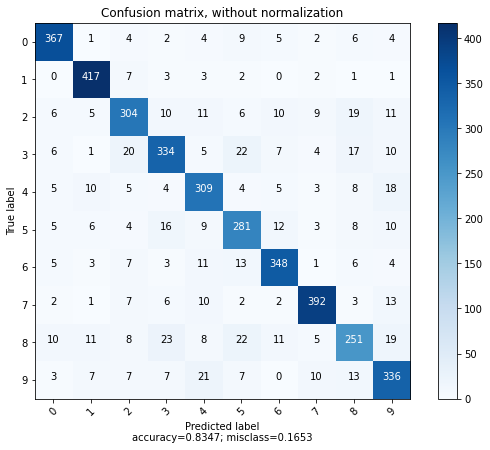

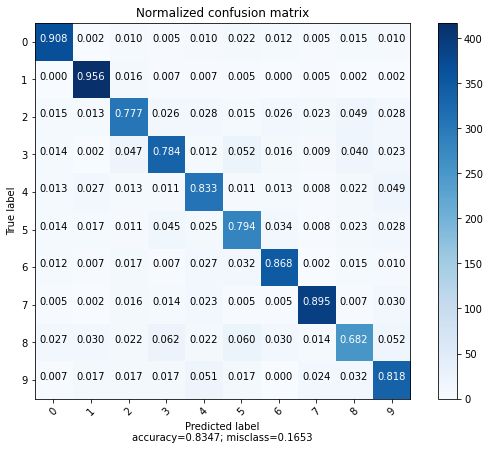

In [13]:
# Plot non-normalized confusion matrix
from sklearn.metrics import confusion_matrix
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'];
titles_options = [("Confusion matrix, without normalization", False),
                  ("Normalized confusion matrix", True)]
y_hat = clf.predict(training_set.X_test);

#TO BE COMPLETED use confusion matrix function to create conf_mx
conf_mx = confusion_matrix(training_set.y_test, y_hat)

plt.figure(figsize=(10,6))  
for title, normalize in titles_options:
    disp = plot_confusion_matrix(cm=conf_mx,
                                 target_names=class_names,
                                 title=title,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)

> *The most difficult digit to label for this classifier was '8', since we have the lowest percentage (74.4%) of correct classifications. In contradiction, the digit '1' was the easiest to classify.*

## 6 - **Testing other ML models** 
This section you will test the performance (section 5) of other ML classifiers such as random forest and SVM.


### 6.a Random Forest classifier
A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. \\
Initialize the model with *RandomForestClassifier(n_estimators=50,max_depth=7, random_state=0)* \\
The hyper-parameters are the number of trees (n_estimators) and maximum depth (max_depth). \\
For more details on Random Forest classifier in sklearn, you can refer to [Random Forest classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

 16% (1 of 6) |####                      | Elapsed Time: 0:00:00 ETA:   0:00:00

Number of trees of : 1


100% (6 of 6) |##########################| Elapsed Time: 0:00:01 ETA:  00:00:00

<Figure size 576x288 with 0 Axes>

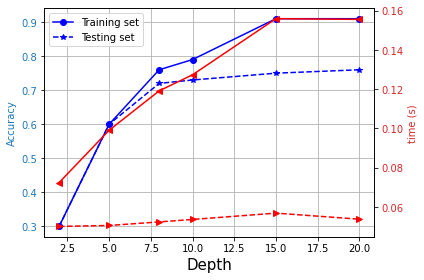

N/A% (0 of 6) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

Number of trees of : 10


100% (6 of 6) |##########################| Elapsed Time: 0:00:05 ETA:  00:00:00

<Figure size 576x288 with 0 Axes>

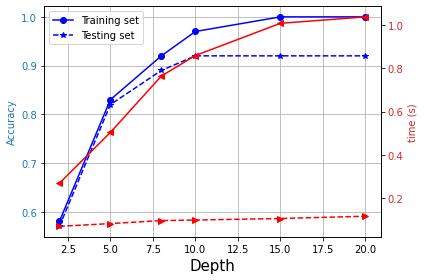

N/A% (0 of 6) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

Number of trees of : 20


100% (6 of 6) |##########################| Elapsed Time: 0:00:09 ETA:  00:00:00

<Figure size 576x288 with 0 Axes>

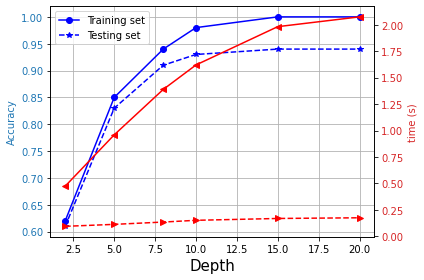

N/A% (0 of 6) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

Number of trees of : 30


100% (6 of 6) |##########################| Elapsed Time: 0:00:14 ETA:  00:00:00

<Figure size 576x288 with 0 Axes>

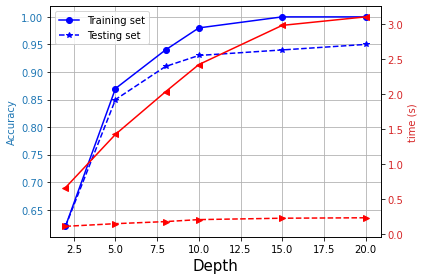

N/A% (0 of 6) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

Number of trees of : 40


100% (6 of 6) |##########################| Elapsed Time: 0:00:18 ETA:  00:00:00

<Figure size 576x288 with 0 Axes>

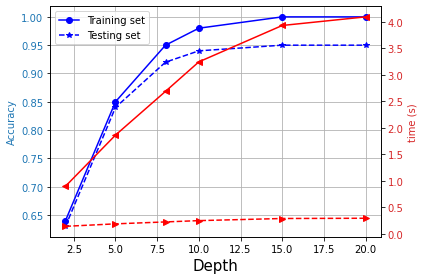

In [14]:
from sklearn.ensemble import RandomForestClassifier

depths = [2,5,8,10,15,20]
trees = [1, 10, 20, 30, 40]


for s in trees:
  idx = 0;
  score_training = [0.0 for i in range(len(depths))]
  score_testing  = [0.0 for i in range(len(depths))]
  time_train  = [0.0 for i in range(len(depths))]
  time_test  = [0.0 for i in range(len(depths))]
  print ("Number of trees of : " + str(s))
  bar = progressbar.ProgressBar(maxval=len(depths)).start()
  for d in depths:
    #TO BE COMPLETED initialize the RF model
    clf = RandomForestClassifier(n_estimators=s, max_depth=d) 
    t = time.process_time()
    #TO BE COMPLETED run the training
    clf.fit(training_set.X_train, training_set.y_train)
    time_train[idx] = time.process_time() - t
    score_training[idx] = round(clf.score(training_set.X_train, training_set.y_train),2);
    time_test[idx] = time.process_time() - t - time_train[idx]
    score_testing[idx] = round(clf.score(training_set.X_test, training_set.y_test),2);
    idx +=1;
    bar.update(idx)


  plt.figure(figsize=(8,4))
  fig, ax1 = plt.subplots()

  color = 'tab:blue'
  ax1.set_xlabel('Depth', fontsize=15,)
  ax1.set_ylabel('Accuracy', color=color)
  ax1.plot(depths, score_training, '-bo', label='Training set')
  ax1.plot(depths, score_testing, '--b*', label='Testing set')
  ax1.tick_params(axis='y', labelcolor=color)
  plt.legend(loc='upper left')
  plt.grid()
  ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
  color = 'tab:red'

  ax2.set_ylabel('time (s)', color=color)
  ax2.plot(depths, time_train, '-r<', label='Training set')  # we already handled the x-label with ax1  
  ax2.plot(depths, time_test, '--r>', label='Testing set')  # we already handled the x-label with ax1
  ax2.tick_params(axis='y', labelcolor=color)
  fig.tight_layout()  # otherwise the right y-label is slightly clipped

  
  plt.show()

### 6.b SVM classifier with diffrent kernels
Initialize the SVM model by *svm.SVC(kernel='')* and test different kernels :
1.   linear
2.   poly (Polynomial) hyper-parameters: Optional degree=3-8 / gamma='scale'/auto
3. rbf (Radial Basis Function / Gaussian): Optional gamma='scale'/auto
4. sigmoid: Optional gamma='scale'/auto

For more details on svm classifier in sklearn, you can refer to [SVC classifier](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

Compare your results with the performance reported on [MNIST](http://yann.lecun.com/exdb/mnist/) web site. 


In [15]:
from sklearn import svm
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
bar = progressbar.ProgressBar(maxval=len(kernels)).start()
idx = 0;
for ker in kernels:   
  print('\nKernel: ' + ker)
  #TO BE COMPLETED initialize the model
  clf = svm.SVC(kernel=ker)
  t = time.process_time()
  #TO BE COMPLETED run the training
  clf.fit(training_set.X_train, training_set.y_train)
  print ( 'processing time : ' + str (round((time.process_time() - t),2)))
  print ('Accuracy on training set= ' +  str(round(clf.score(training_set.X_train, training_set.y_train),2)));
  print ('Accuracy on testing set= ' +  str(round(clf.score(training_set.X_test, training_set.y_test),2))); 
  idx +=1;
  bar.update(idx)

N/A% (0 of 4) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--


Kernel: linear
processing time : 47.48
Accuracy on training set= 0.99


 25% (1 of 4) |######                    | Elapsed Time: 0:02:23 ETA:   0:07:09

Accuracy on testing set= 0.92

Kernel: poly
processing time : 78.92
Accuracy on training set= 0.99


 50% (2 of 4) |#############             | Elapsed Time: 0:05:27 ETA:   0:06:08

Accuracy on testing set= 0.96

Kernel: rbf
processing time : 75.61
Accuracy on training set= 0.99


 75% (3 of 4) |###################       | Elapsed Time: 0:09:01 ETA:   0:03:33

Accuracy on testing set= 0.97

Kernel: sigmoid
processing time : 84.64
Accuracy on training set= 0.8


100% (4 of 4) |##########################| Elapsed Time: 0:13:10 ETA:  00:00:00

Accuracy on testing set= 0.8


> *We obtained better perfomance comparing 0.03 with the errors of 0.68, 0.68 e 0.56 for Virtual SVM deg-9 poly results.*


## 7 - Test the performance of different classifiers with Fashion-MNIST dataset 
> You can find [here](https://github.com/zalandoresearch/fashion-mnist) the benchmark of different classifiers on Fashion-MNIST dataset

In [16]:
fashionMnist = fetch_openml('Fashion-MNIST') #You can also use and test Fashion-MNIST dataset

In [17]:
samples = 15000
training_set = Dataset(fashionMnist, samples)

Digit target: 9
Digit target size: 28x28| mean : 97.25| var : 10361.68| std :101.79| entropy :4.71
Digit image:


<Figure size 432x288 with 0 Axes>

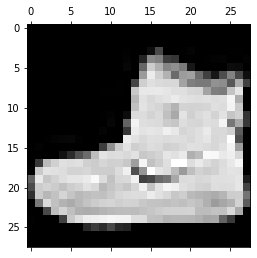

Digit target: 0
Digit target size: 28x28| mean : 107.91| var : 10166.98| std :100.83| entropy :4.88
Digit image:


<Figure size 432x288 with 0 Axes>

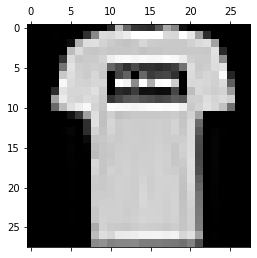

Digit target: 0
Digit target size: 28x28| mean : 36.56| var : 2469.97| std :49.7| entropy :3.07
Digit image:


<Figure size 432x288 with 0 Axes>

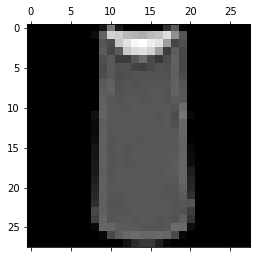

Digit target: 3
Digit target size: 28x28| mean : 59.5| var : 4205.43| std :64.85| entropy :4.13
Digit image:


<Figure size 432x288 with 0 Axes>

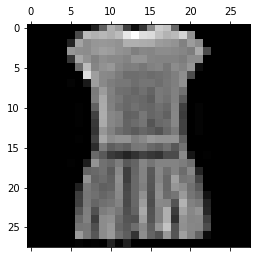

Digit target: 0
Digit target size: 28x28| mean : 78.04| var : 10783.42| std :103.84| entropy :3.27
Digit image:


<Figure size 432x288 with 0 Axes>

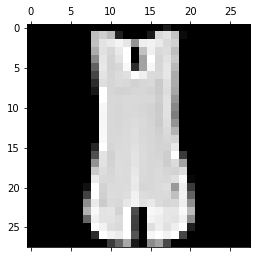

Digit target: 2
Digit target size: 28x28| mean : 107.35| var : 7963.85| std :89.24| entropy :5.56
Digit image:


<Figure size 432x288 with 0 Axes>

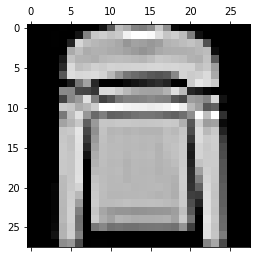

Digit target: 7
Digit target size: 28x28| mean : 41.49| var : 6027.96| std :77.64| entropy :3.06
Digit image:


<Figure size 432x288 with 0 Axes>

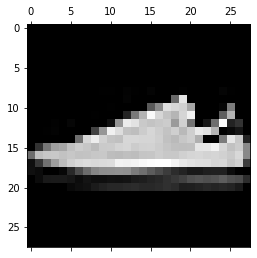

Digit target: 2
Digit target size: 28x28| mean : 146.92| var : 12188.1| std :110.4| entropy :4.82
Digit image:


<Figure size 432x288 with 0 Axes>

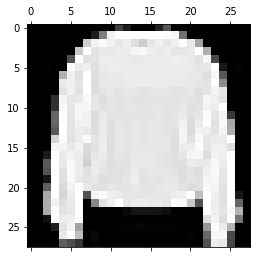

Digit target: 5
Digit target size: 28x28| mean : 25.37| var : 2822.77| std :53.13| entropy :2.92
Digit image:


<Figure size 432x288 with 0 Axes>

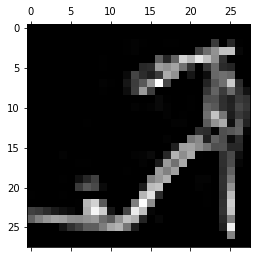

Digit target: 5
Digit target size: 28x28| mean : 51.91| var : 8124.25| std :90.13| entropy :3.5
Digit image:


<Figure size 432x288 with 0 Axes>

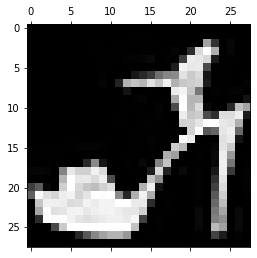

In [18]:
samples_to_diplay = 10#TO BE COMPLETED
for i in range(samples_to_diplay):
  training_set.digits[i].print()

Size of training set : 12000 / 15000
Size of testing set : 3000 / 15000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:111: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


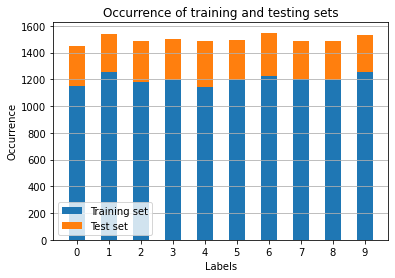

In [19]:
test_ratio = 0.2;
training_set.separate_train_test(test_ratio)
training_set.display_train_test()

### K-Neighbors Classifier

In [20]:
from sklearn.neighbors import KNeighborsClassifier
KNclf = KNeighborsClassifier(n_neighbors=10)
KNclf.fit(training_set.X_train, training_set.y_train)

print ("Accuracy on training set " + str(round(KNclf.score(training_set.X_train, training_set.y_train),2)));
print ("Accuracy on testing set " + str(round(KNclf.score(training_set.X_test, training_set.y_test),2)));

Accuracy on training set 0.85
Accuracy on testing set 0.82


### Naive Bayes Classifier

In [21]:
from sklearn.naive_bayes import GaussianNB
NBclf = GaussianNB()
NBclf.fit(training_set.X_train, training_set.y_train)

print ("Accuracy on training set " + str(round(NBclf.score(training_set.X_train, training_set.y_train),2)));
print ("Accuracy on testing set " + str(round(NBclf.score(training_set.X_test, training_set.y_test),2)));

Accuracy on training set 0.54
Accuracy on testing set 0.53


### AdaBoost Classifier

In [22]:
from sklearn.ensemble import AdaBoostClassifier

ADBclf = AdaBoostClassifier(n_estimators=100, random_state=0)
ADBclf.fit(training_set.X_train, training_set.y_train)

print ("Accuracy on training set " + str(round(ADBclf.score(training_set.X_train, training_set.y_train),2)));
print ("Accuracy on testing set " + str(round(ADBclf.score(training_set.X_test, training_set.y_test),2)));

Accuracy on training set 0.41
Accuracy on testing set 0.39


### Multi-layer Perceptron Classifier

In [23]:
from sklearn.neural_network import MLPClassifier
MLPclf = MLPClassifier(random_state=1, solver="adam", batch_size=256, activation="relu", max_iter=300)
MLPclf.fit(training_set.X_train, training_set.y_train)

print ("Accuracy on training set " + str(round(MLPclf.score(training_set.X_train, training_set.y_train),2)));
print ("Accuracy on testing set " + str(round(MLPclf.score(training_set.X_test, training_set.y_test),2)));

Accuracy on training set 1.0
Accuracy on testing set 0.88
